# Introduction

In this notebook, an exploratory data analysis (EDA) is conducted on the 2023 Legatum Prosperity Index dataset. The Legatum Prosperity Index is a comprehensive ranking of countries based on various dimensions of prosperity and development. It encompasses indicators such as safety and security, personal freedom, governance, social capital, investment environment, enterprise conditions, market access and infrastructure, economic quality, living conditions, health, education, and natural environment. By examining these indicators, insights into the factors that contribute to the overall prosperity of nations are gained.

The analysis includes:

- **Data Cleaning and Preparation:** The dataset is tidied and prepared for analysis by addressing any inconsistencies or missing values.
- **Descriptive Statistics:** The central tendencies, dispersions, and distributions of the indicators are summarized.
- **Visualizations:** Various plots are created to illustrate the relationships and distributions of the indicators, including a world map to visualize the geographical distribution of the average scores.
- **Correlation Analysis:** The correlations between different indicators are investigated to understand how they interact with each other.

In subsequent stages, separate notebooks will be used for:

- **Principal Component Analysis (PCA):** To reduce the dimensionality of the dataset and identify the most significant indicators.
- **K-Means Clustering:** To group countries into clusters based on their prosperity indicators.
- **K-Medoids Clustering:** To provide an alternative clustering method that is less sensitive to outliers.

Through this EDA, patterns and relationships within the data that can provide valuable insights into the factors driving prosperity across different countries are uncovered. This analysis also serves as a foundation for more advanced modeling and hypothesis testing in future studies.


In [1]:
library(ggplot2)
library(tidyr)
library(dplyr)
library(corrplot)
library(rnaturalearth)
library(rnaturalearthdata)
library(stringr)

data=read.csv("/kaggle/input/2023-global-country-development-and-prosperity-index/data.csv")
head(data)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


corrplot 0.92 loaded

Support for Spatial objects (`sp`) will be deprecated in {rnaturalearth} and will be removed in a future release of the package. Please use `sf` objects with {rnaturalearth}. For example: `ne_download(returnclass = 'sf')`


Attaching package: ‘rnaturalearthdata’


The following object is masked from ‘package:rnaturalearth’:

    countries110




,Country,AveragScore,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Denmark,84.55,92.59,94.09,89.45,82.56,82.42,79.64,78.79,76.81,95.77,81.07,87.48,73.94
2,Sweden,83.67,90.97,91.90,86.41,78.29,82.81,75.54,79.67,76.18,95.33,82.28,85.92,78.74
3,Norway,83.59,93.30,94.10,89.66,79.03,82.24,75.95,75.87,77.25,94.70,82.98,85.68,72.37
4,Finland,83.47,89.56,91.96,90.41,77.27,84.12,77.25,78.77,70.28,94.46,81.19,88.38,77.99
5,Switzerland,83.42,95.66,87.50,87.67,69.14,80.81,83.84,78.65,79.71,94.66,82.11,87.72,73.60
6,Netherlands,82.32,91.19,90.08,87.34,74.03,84.11,79.09,80.82,74.34,95.86,82.05,86.43,62.49


# BOXPLOT VISUALIZATIONS

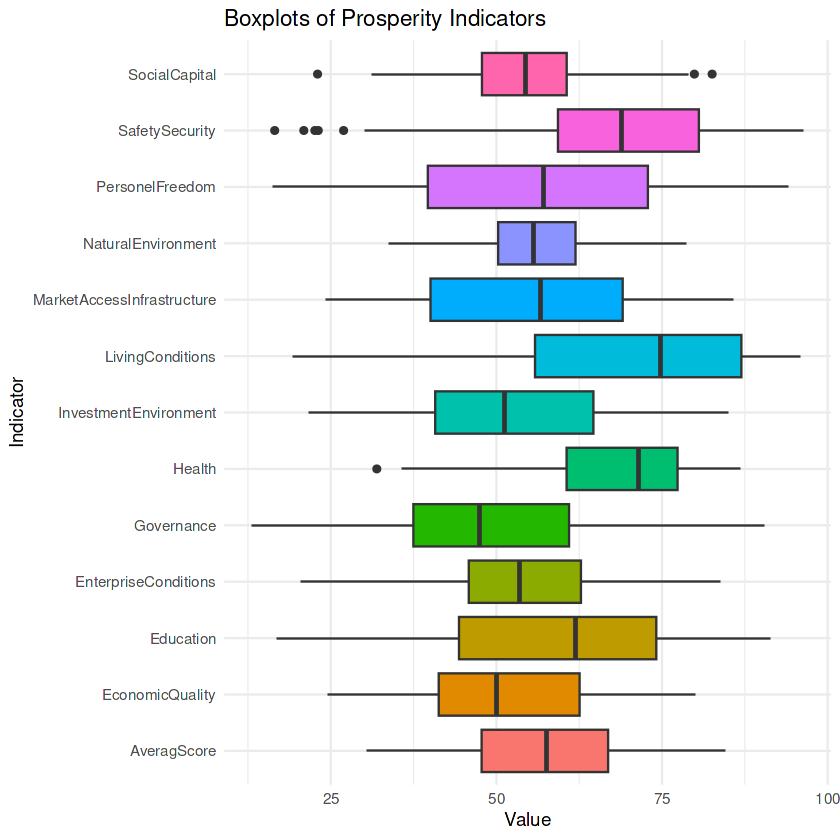

In [2]:


data_long <- data %>%
  pivot_longer(cols = -Country, names_to = "Indicator", values_to = "Value")

ggplot(data_long, aes(x = Indicator, y = Value, fill = Indicator)) +
  geom_boxplot() +
  coord_flip() +  
  labs(title = "Boxplots of Prosperity Indicators",
       x = "Indicator",
       y = "Value") +
  theme_minimal() +
  theme(legend.position = "none")

The average score (AveragScore) ranges from 25 to 75, with a median around 50. This indicates that the overall development levels of countries are widely distributed, with many countries falling around the average. The Safety and Security (SafetySecurity) indicator generally shows high values, although there are outliers where some countries have lower security levels. Personal Freedom (PersonelFreedom) and Governance (Governance) indicators similarly span a wide range, with median values around 70 and 60, respectively. This highlights significant differences in personal freedom and governance quality among countries.

Social Capital (SocialCapital), Investment Environment (InvestmentEnvironment), and Enterprise Conditions (EnterpriseConditions) indicators also vary among countries. Social capital, in particular, ranges from 30 to 80, while investment environment and enterprise conditions range from 40 to 80. These indicators reflect the diversity in social and economic structures across countries.

Market Access and Infrastructure (MarketAccessInfrastructure) and Economic Quality (EconomicQuality) indicators have a distribution between 50 and 80. This shows variability in infrastructure and market access as well as economic quality across different nations. Living Conditions (LivingConditions) indicator ranges from 40 to 90, with a median around 70, indicating substantial differences in living standards among countries.

Health (Health) and Education (Education) indicators cover a broad range (40 to 90), with median values around 60 and 70. This illustrates significant variations in healthcare services and education quality among countries. The Natural Environment (NaturalEnvironment) indicator ranges from 30 to 80, with a median around 60. This underscores the differences in environmental preservation and sustainability levels across nations.

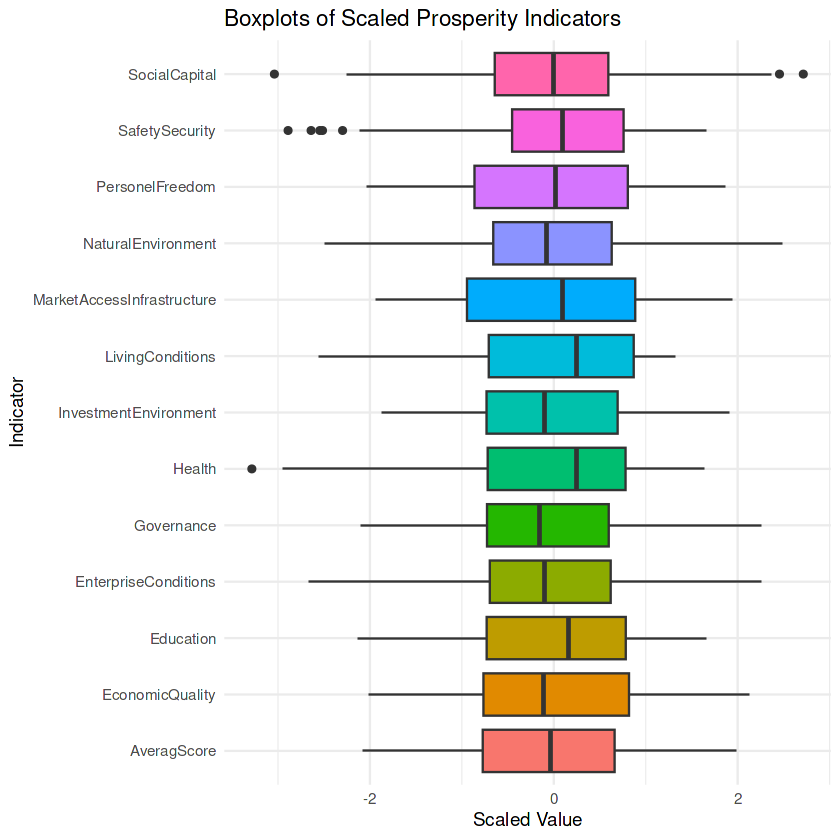

In [3]:
scaled_data <- data %>%
  select(-Country) %>%
  scale(center = TRUE, scale = TRUE) %>%
  as.data.frame()

scaled_data$Country <- data$Country

scaled_data_long <- scaled_data %>%
  pivot_longer(cols = -Country, names_to = "Indicator", values_to = "Value")

ggplot(scaled_data_long, aes(x = Indicator, y = Value, fill = Indicator)) +
  geom_boxplot() +
  coord_flip() +  
  labs(title = "Boxplots of Scaled Prosperity Indicators",
       x = "Indicator",
       y = "Scaled Value") +
  theme_minimal() +
  theme(legend.position = "none")

The scaled boxplot shows the normalized values of the data, allowing each indicator to be compared on the same scale. However, in this dataset, all parameters already range from 0 to 100, making it sensible to work with the data without scaling. In the unscaled graph, each indicator is presented with its own unit and scale, making it easier to understand the indicators in their original context. For example, indicators like SafetySecurity and Health have a wide distribution with several outliers. The LivingConditions indicator is spread across a wider range compared to others. Differences between indicators are evident due to each having its own scale.

In the scaled graph, all indicators are normalized to the same scale, making it easier to see differences in distributions. While the original graph shows each indicator in its own unit and scale, the normalized graph presents all indicators on the same scale, highlighting similarities and differences more clearly. Outliers are present in both graphs, but in the normalized values, they appear more centrally distributed. This comparison allows us to evaluate the distributions and performances of indicators more objectively. However, since all indicators range from 0 to 100, performing clustering analysis without scaling is also logical. This simplifies the analysis process and retains the original context of the indicators.

# CORRELATION VISUALIZATIONS

In [4]:
corr <- cor(data[,2:14], method = c("pearson","kendall","spearman"))
corr

,AveragScore,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment
AveragScore,1.0000000,0.8286043,0.7630933,0.9240586,0.7645955,0.9486494,0.8840385,0.9433409,0.9062940,0.8944886,0.8453267,0.9102754,0.6918733
SafetySecurity,0.8286043,1.0000000,0.6550186,0.7625535,0.6077455,0.7279673,0.6910160,0.7112079,0.7098024,0.6960774,0.6419238,0.7060964,0.5779618
PersonelFreedom,0.7630933,0.6550186,1.0000000,0.8163123,0.6251797,0.6700443,0.6496571,0.5869381,0.5697417,0.5406233,0.4495919,0.5456998,0.7225107
Governance,0.9240586,0.7625535,0.8163123,1.0000000,0.6964100,0.9078410,0.9128200,0.8143549,0.8195496,0.7092157,0.6718444,0.7441135,0.6606324
SocialCapital,0.7645955,0.6077455,0.6251797,0.6964100,1.0000000,0.6648110,0.6105658,0.6561130,0.6841178,0.6293916,0.6182214,0.6567346,0.6030995
InvestmentEnvironment,0.9486494,0.7279673,0.6700443,0.9078410,0.6648110,1.0000000,0.9294641,0.9296575,0.8903182,0.8257216,0.7873502,0.8411109,0.5915626
EnterpriseConditions,0.8840385,0.6910160,0.6496571,0.9128200,0.6105658,0.9294641,1.0000000,0.8462679,0.8349193,0.6877950,0.6714879,0.7287170,0.5669594
MarketAccessInfrastructure,0.9433409,0.7112079,0.5869381,0.8143549,0.6561130,0.9296575,0.8462679,1.0000000,0.8879706,0.9166084,0.8737858,0.9144986,0.5706525
EconomicQuality,0.9062940,0.7098024,0.5697417,0.8195496,0.6841178,0.8903182,0.8349193,0.8879706,1.0000000,0.8132584,0.7658000,0.8366795,0.5620172
LivingConditions,0.8944886,0.6960774,0.5406233,0.7092157,0.6293916,0.8257216,0.6877950,0.9166084,0.8132584,1.0000000,0.9032194,0.9378222,0.4819822


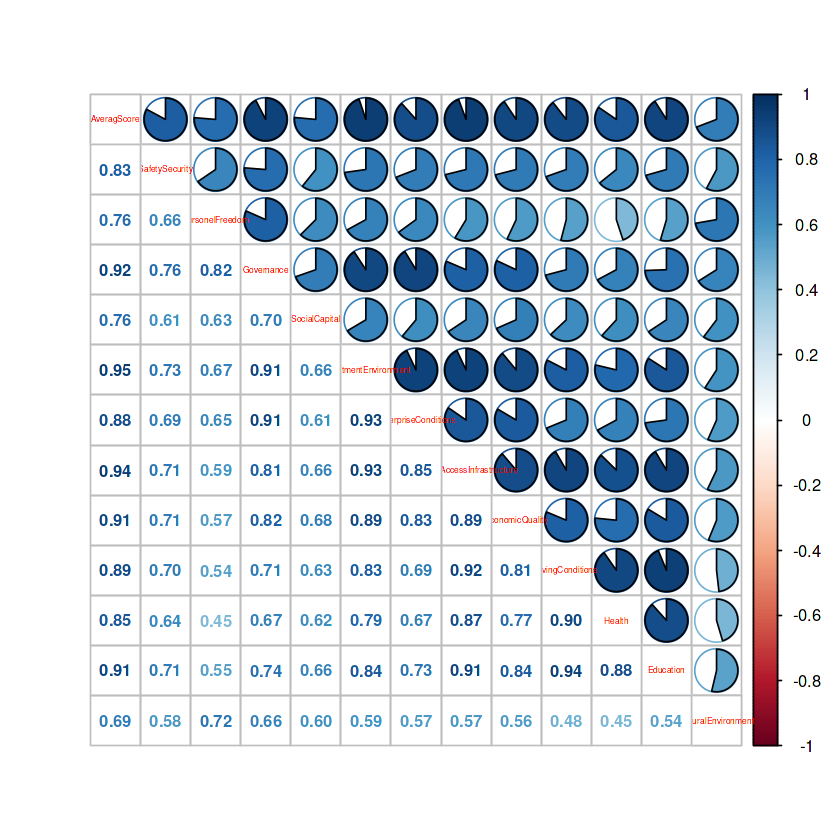

In [5]:
corrplot.mixed(corr, 
               tl.cex = 0.4, 
               number.cex = 0.8, 
               upper = "pie")

The correlation matrix visually presents the relationships between various indicators in the 2023 Legatum Prosperity Index data. In this matrix, each cell represents the correlation coefficient between two indicators, with values ranging from -1 to 1. Values close to 1 indicate a strong positive correlation, while values close to -1 indicate a strong negative correlation. Overall, AveragScore shows a high degree of positive correlation with other indicators, especially with InvestmentEnvironment, MarketAccessInfrastructure, and Governance. This suggests that the overall average score is significantly influenced by these three indicators. SafetySecurity has a strong positive correlation with AveragScore but shows moderate correlations with other indicators, indicating that safety and security might be somewhat independent of other factors.

PersonelFreedom shows high correlations with Governance and NaturalEnvironment, while Governance has very high correlations with InvestmentEnvironment and EnterpriseConditions. This indicates that governance is closely related to the investment environment and business conditions. SocialCapital has moderate correlations with other indicators, with the highest being with Governance. InvestmentEnvironment has very high correlations with Governance and MarketAccessInfrastructure, showing that the investment environment is strongly linked to good governance and market access. EnterpriseConditions has high correlations with InvestmentEnvironment and Governance, indicating that business conditions are closely related to the investment environment and governance quality.

MarketAccessInfrastructure shows very high correlations with InvestmentEnvironment and Governance, indicating that market access and infrastructure are connected to the investment environment and overall prosperity. EconomicQuality has high correlations with MarketAccessInfrastructure and Governance, showing a connection to overall prosperity. LivingConditions has very high correlations with Education and Health, indicating that living conditions are linked to education, health, and overall prosperity. Health has high correlations with LivingConditions and Education, while Education also has very high correlations with LivingConditions and Health, showing that education is linked to living conditions, health, and overall prosperity. NaturalEnvironment has moderate correlations with other indicators, with the highest being with PersonelFreedom, indicating that the natural environment is related to personal freedom.

# WORLD MAP VISUALIZATION OF AVERAGE SCORES

In order to align the country names in our dataset with those in the world map data, several manual adjustments are required. These discrepancies often arise from differences in naming conventions, such as short forms, official names, or local language variations. For example, "United States of America" in our dataset is adjusted to "United States" to match the name used in the world map data. Similarly, "South Korea" is changed to "Korea," and "Ivory Coast" is adjusted to "Côte d'Ivoire." These manual adjustments ensure that each country in our dataset correctly corresponds to the names used in the world map, allowing for accurate visualization and analysis.

In [6]:
world <- ne_countries(scale = "medium", returnclass = "sf")

world$name

[1] "Aruba"                     "Afghanistan"              
  [3] "Angola"                    "Anguilla"                 
  [5] "Albania"                   "Aland"                    
  [7] "Andorra"                   "United Arab Emirates"     
  [9] "Argentina"                 "Armenia"                  
 [11] "American Samoa"            "Antarctica"               
 [13] "Ashmore and Cartier Is."   "Fr. S. Antarctic Lands"   
 [15] "Antigua and Barb."         "Australia"                
 [17] "Austria"                   "Azerbaijan"               
 [19] "Burundi"                   "Belgium"                  
 [21] "Benin"                     "Burkina Faso"             
 [23] "Bangladesh"                "Bulgaria"                 
 [25] "Bahrain"                   "Bahamas"                  
 [27] "Bosnia and Herz."          "St-Barthélemy"            
 [29] "Belarus"                   "Belize"                   
 [31] "Bermuda"                   "Bolivia"                  
 [33] "Brazil"                    "Barbados"                 
 [35] "Brunei"                    "Bhutan"                   
 [37] "Botswana"                  "Central African Rep."     
 [39] "Canada"                    "Switzerland"              
 [41] "Chile"                     "China"                    
 [43] "Côte d'Ivoire"             "Cameroon"                 
 [45] "Dem. Rep. Congo"           "Congo"                    
 [47] "Cook Is."                  "Colombia"                 
 [49] "Comoros"                   "Cape Verde"               
 [51] "Costa Rica"                "Cuba"                     
 [53] "Curaçao"                   "Cayman Is."               
 [55] "N. Cyprus"                 "Cyprus"                   
 [57] "Czech Rep."                "Germany"                  
 [59] "Djibouti"                  "Dominica"                 
 [61] "Denmark"                   "Dominican Rep."           
 [63] "Algeria"                   "Ecuador"                  
 [65] "Egypt"                     "Eritrea"                  
 [67] "Spain"                     "Estonia"                  
 [69] "Ethiopia"                  "Finland"                  
 [71] "Fiji"                      "Falkland Is."             
 [73] "France"                    "Faeroe Is."               
 [75] "Micronesia"                "Gabon"                    
 [77] "United Kingdom"            "Georgia"                  
 [79] "Guernsey"                  "Ghana"                    
 [81] "Guinea"                    "Gambia"                   
 [83] "Guinea-Bissau"             "Eq. Guinea"               
 [85] "Greece"                    "Grenada"                  
 [87] "Greenland"                 "Guatemala"                
 [89] "Guam"                      "Guyana"                   
 [91] "Hong Kong"                 "Heard I. and McDonald Is."
 [93] "Honduras"                  "Croatia"                  
 [95] "Haiti"                     "Hungary"                  
 [97] "Indonesia"                 "Isle of Man"              
 [99] "India"                     "Indian Ocean Ter."        
[101] "Br. Indian Ocean Ter."     "Ireland"                  
[103] "Iran"                      "Iraq"                     
[105] "Iceland"                   "Israel"                   
[107] "Italy"                     "Jamaica"                  
[109] "Jersey"                    "Jordan"                   
[111] "Japan"                     "Siachen Glacier"          
[113] "Kazakhstan"                "Kenya"                    
[115] "Kyrgyzstan"                "Cambodia"                 
[117] "Kiribati"                  "St. Kitts and Nevis"      
[119] "Korea"                     "Kosovo"                   
[121] "Kuwait"                    "Lao PDR"                  
[123] "Lebanon"                   "Liberia"                  
[125] "Libya"                     "Saint Lucia"              
[127] "Liechtenstein"             "Sri Lanka"                
[129] "Lesotho"                   

In [7]:
data$Country

[1] " Denmark"                      " Sweden"                      
  [3] " Norway"                       " Finland"                     
  [5] "  Switzerland"                 " Netherlands"                 
  [7] " Luxembourg"                   " Iceland"                     
  [9] " Germany"                      " New Zealand"                 
 [11] " Ireland"                      " United Kingdom"              
 [13] " Canada"                       " Austria"                     
 [15] " Australia"                    " Japan"                       
 [17] " Singapore"                    " Belgium"                     
 [19] " United States"                " Taiwan"                      
 [21] " Estonia"                      " Hong Kong"                   
 [23] " France"                       " Spain"                       
 [25] " Czech Republic"               " Portugal"                    
 [27] " Slovenia"                     " Malta"                       
 [29] " South Korea"                  " Italy"                       
 [31] " Latvia"                       " Lithuania"                   
 [33] " Israel"                       " Cyprus"                      
 [35] " Slovakia"                     " Chile"                       
 [37] " Poland"                       " Uruguay"                     
 [39] " Costa Rica"                   " Greece"                      
 [41] " Croatia"                      " Hungary"                     
 [43] " Malaysia"                     " United Arab Emirates"        
 [45] " Romania"                      " Qatar"                       
 [47] " Mauritius"                    " Bulgaria"                    
 [49] " Montenegro"                   " Panama"                      
 [51] " Seychelles"                   " Serbia"                      
 [53] " Georgia"                      " China"                       
 [55] " Macedonia"                    " Trinidad and Tobago"         
 [57] " Jamaica"                      " Argentina"                   
 [59] " Peru"                         " Kuwait"                      
 [61] " Armenia"                      " Bahrain"                     
 [63] " Indonesia"                    " Thailand"                    
 [65] " Albania"                      " Brazil"                      
 [67] " Oman"                         " Dominican Republic"          
 [69] " Kazakhstan"                   " Moldova"                     
 [71] " Mexico"                       " Bosnia and Herzegovina"      
 [73] " Vietnam"                      " Ukraine"                     
 [75] " South Africa"                 " Paraguay"                    
 [77] " Russia"                       " Belarus"                     
 [79] " Saudi Arabia"                 " Cabo Verde"                  
 [81] " Colombia"                     " Suriname"                    
 [83] " Botswana"                     " Philippines"                 
 [85] " Ecuador"                      " Jordan"                      
 [87] " São Tomé and Príncipe"        " Mongolia"                    
 [89] " Guyana"                       " Namibia"                     
 [91] " Sri Lanka"                    " Azerbaijan"                  
 [93] " Belize"                       " Kyrgyzstan"                  
 [95] " Turkey"                       " Morocco"                     
 [97] " El Salvador"                  " Ghana"                       
 [99] " Tunisia"                      " Uzbekistan"                  
[101] " Guatemala"                    " Senegal"                     
[103] " India"                        " Cuba"                        
[105] " Honduras"                     " Bolivia"                     
[107] " Turkmenistan"                 " Kenya"                       
[109] " Algeria"                      "   Nepal"                     
[111] " Rwanda"                       " Lebanon"                     
[113] " Tajikistan"                   " Nicaragua"                   
[115] " Laos

In [8]:
data$Country <- str_trim(data$Country)

data <- data %>%
  mutate(Country = case_when(
    Country == "United States of America" ~ "United States",
    Country == "South Korea" ~ "Korea",
    Country == "North Korea" ~ "Dem. Rep. Korea",
    Country == "Ivory Coast" ~ "Côte d'Ivoire",
    Country == "Czech Republic" ~ "Czech Rep.",
    Country == "Dominican Republic" ~ "Dominican Rep.",
    Country == "Bosnia and Herzegovina" ~ "Bosnia and Herz.",
    Country == "Cabo Verde" ~ "Cape Verde",
    Country == "São Tomé and Príncipe" ~ "São Tomé and Principe",
    Country == "Equatorial Guinea" ~ "Eq. Guinea",
    Country == "Democratic Republic of Congo" ~ "Dem. Rep. Congo",
    Country == "Central African Republic" ~ "Central African Rep.",
    Country == "South Sudan" ~ "S. Sudan",
    Country == "Laos" ~ "Lao PDR",
    TRUE ~ Country
  ))

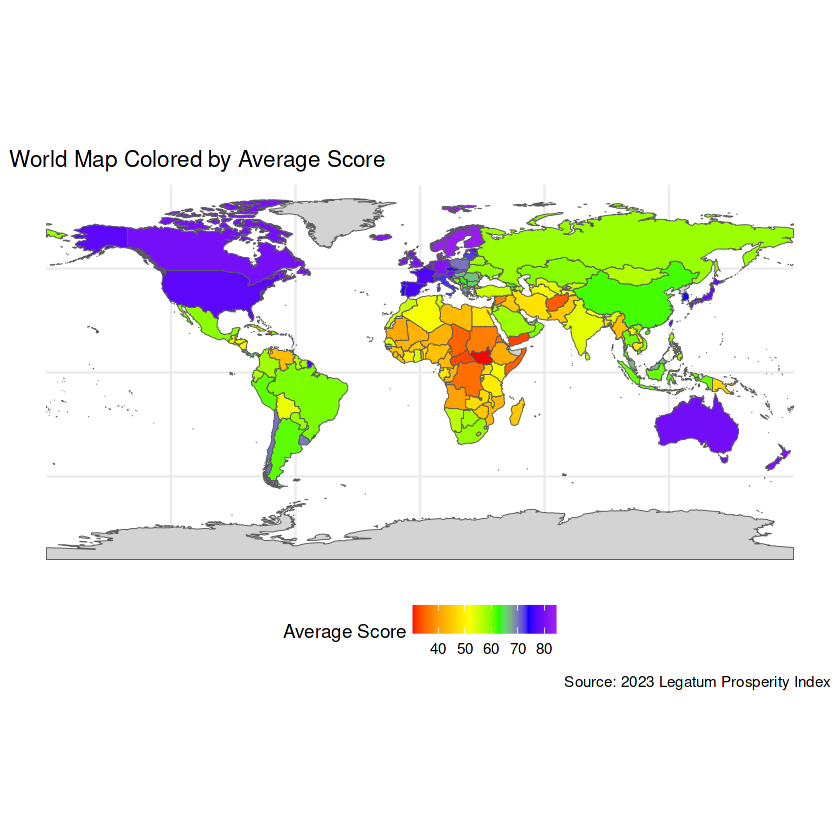

In [9]:
world_data <- left_join(world, data, by = c("name" = "Country"))

ggplot(data = world_data) +
  geom_sf(aes(fill = AveragScore)) +
  scale_fill_gradientn(colors = c("red", "orange", "yellow", "green","blue","purple"), 
                       values = scales::rescale(c(min(data$AveragScore, na.rm = TRUE), 
                                                  quantile(data$AveragScore, 0.25, na.rm = TRUE), 
                                                  quantile(data$AveragScore, 0.75, na.rm = TRUE), 
                                                  max(data$AveragScore, na.rm = TRUE))),
                       na.value = "lightgrey", name = "Average Score") +
  theme_minimal() +
  labs(title = "World Map Colored by Average Score",
       caption = "Source: 2023 Legatum Prosperity Index") +
  theme(legend.position = "bottom")

This world map is colored according to the average scores of countries based on the 2023 Legatum Prosperity Index. In the map, countries with low prosperity levels are shown in red and orange tones, those with medium levels in yellow and green tones, and countries with high prosperity levels in blue and purple tones. North America, Western Europe, Australia, and some Asian countries stand out with high levels of prosperity, while some regions in Africa and South Asia exhibit lower levels of prosperity. 